<a href="https://colab.research.google.com/github/inuinana/pytorch_practice/blob/master/binary_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


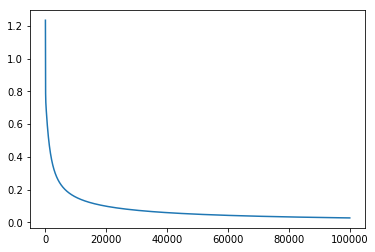

predict 1 hour  1.0 tensor(0, dtype=torch.uint8)
predict 7 hours 7.0 tensor(1, dtype=torch.uint8)


In [14]:
# Akihiro Inui 2019 June
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt

# Define data
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))


class BinaryLogisticRegression(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(BinaryLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # (input_size, output_size)
        self.loss_function = torch.nn.BCELoss(size_average=True) #Binary cross entropy
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

      
    def train(self, visualize=None):
        """
        Training
        """

        # To store loss
        loss_history = []
        # Training loop
        for epoch in range(100000):
            # Forward pass: Compute predicted y by passing x to the model
            y_pred = model(x_data)

            # Compute and print loss
            loss = self.loss_function(y_pred, y_data)
            loss_history.append(loss)
            #print(epoch, loss.data)

            # Zero gradients, perform a backward pass, and update the weights.
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
        # Plot loss history
        if visualize==True:
          plt.plot(loss_history)
          plt.show()
      
# main
if __name__ == "__main__":
    # our model
    model = BinaryLogisticRegression()
    
    # Train model
    model.train(visualize=True)
    
    # Make predictions
    hour_var = Variable(torch.Tensor([[1.0]]))
    print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
    hour_var = Variable(torch.Tensor([[7.0]]))
    print("predict 7 hours", 7.0, model(hour_var).data[0][0] > 0.5)
